#Fake News Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from  sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

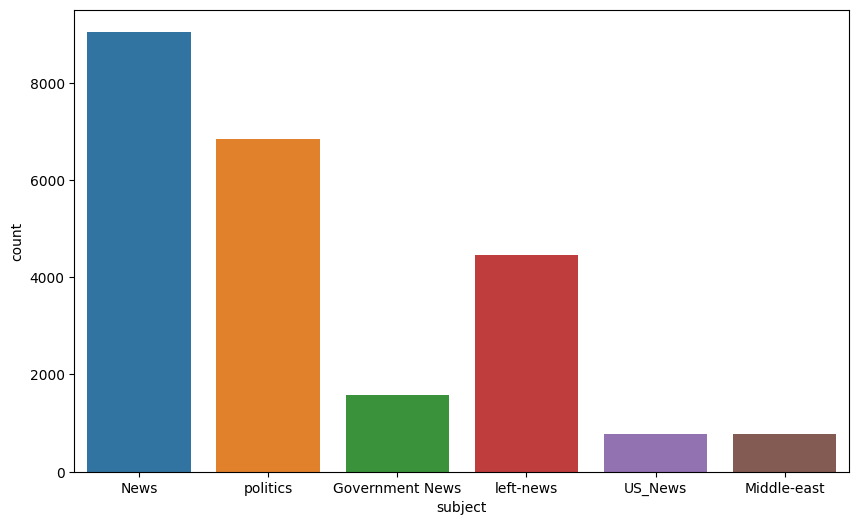

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject' ,data=fake)

##worldcloud

In [8]:
text = ''.join(fake['text'].tolist())

In [9]:
 ' '.join(['this', 'is', 'a', 'data'])

'this is a data'

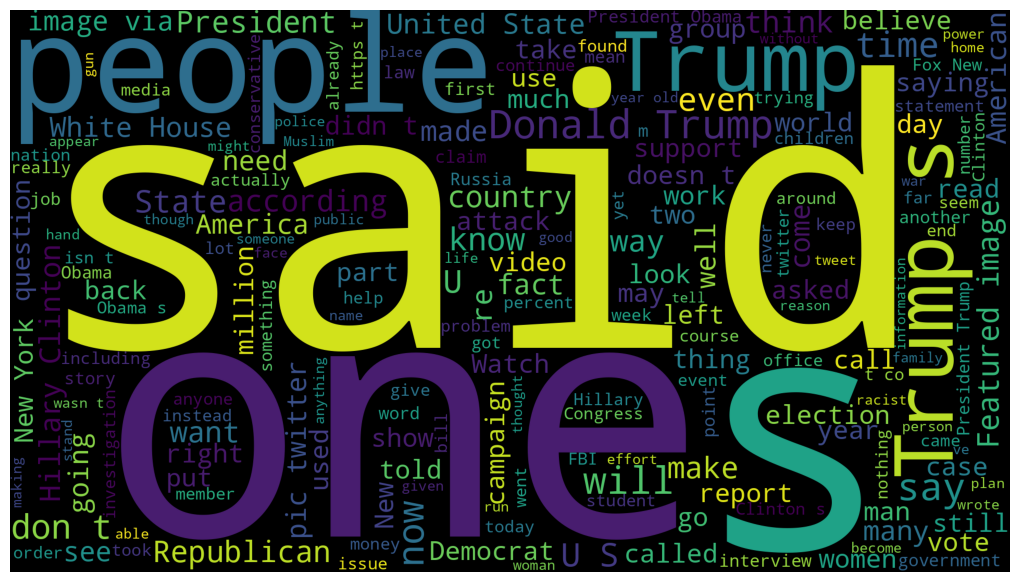

In [10]:
wordcould = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcould)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##Explore real news

In [11]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [12]:
text = ''.join(real['text'].tolist())

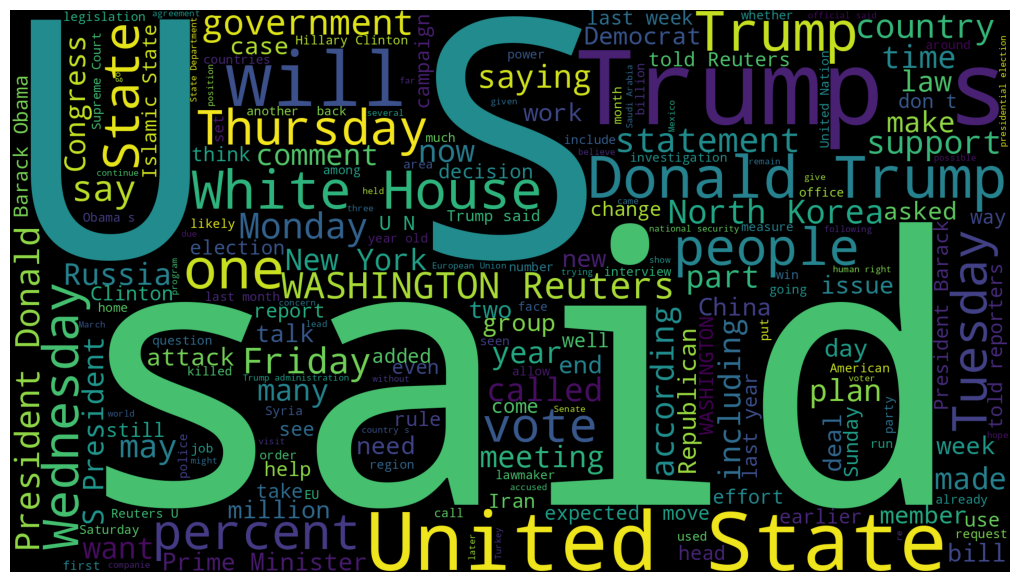

In [13]:
wordcould = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcould)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Difference in text

In [14]:
real.sample(5)

,title,text,subject,date
17764,Chemical weapons watchdog to get new leader as...,AMSTERDAM (Reuters) - A Spanish diplomat has b...,worldnews,"October 11, 2017"
3631,U.S. Senate confirms Iowa Governor Branstad as...,WASHINGTON (Reuters) - The U.S. Senate voted o...,politicsNews,"May 22, 2017"
19546,France's National Front on verge of split afte...,PARIS (Reuters) - Four months after a heavy el...,worldnews,"September 20, 2017"
8295,Trump's immigration pitch falls flat with Repu...,(Reuters) - Republican presidential candidate ...,politicsNews,"September 1, 2016"
6417,Trump secretary of state choice to say Russia ...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 11, 2017"


In [15]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-',maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [16]:
len(unknown_publishers)

222

In [17]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [18]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [19]:
real = real.drop(8970, axis=0)

In [20]:
publishers = []
tmp_text = []

for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publishers.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publishers.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [21]:
real['publishers']=publishers
real['text']= tmp_text

In [22]:
real.head()

,title,text,subject,date,publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [23]:
real.shape

(21416, 5)

In [24]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [25]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [26]:
real['text'] = real["title"]+" "+real['text']
fake['text'] = fake["title"]+" "+fake['text']

In [27]:
real['text'] = real["text"].apply(lambda x: str(x).lower())
fake['text'] = fake["text"].apply(lambda x: str(x).lower())

Preprocessing Text


In [28]:
real['class'] = 1
fake['class'] = 0

In [29]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publishers', 'class'], dtype='object')

In [30]:
real = real[['text', 'class']]

In [31]:
fake = fake[['text', 'class']]

In [32]:
data = real.append(fake, ignore_index=True)

<ipython-input-32-45d5ced910ac>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [33]:
data.sample(5)

,text,class
12928,u.s. officials warn of isis' new caliphate: cy...,1
7153,obama tells latin america and world: give trum...,1
14719,"head of afghan election body sacked, raising d...",1
22614,watch: watergate reporter carl bernstein hamm...,0
33500,president-elect trump’s inaugural committee an...,0


In [34]:
#https://github.com/laxmimerit/preprocess_kgptalkie

In [35]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2023-09-09 14:52:44.368645: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1

In [36]:

import preprocess_kgptalkie as ps

In [37]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [38]:
ps.remove_special_chars('this ,. @ # is gre@t')

'this is gret'

In [39]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


Vectorization -- Word2Vec

In [40]:
import gensim

In [41]:
y = data['class'].values

In [42]:
X = [d.split() for d in data['text'].tolist()]

In [43]:
type(X[0])

list

In [44]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [45]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [46]:
len(w2v_model.wv.index_to_key)


231872

In [47]:
w2v_model.wv['love']

array([ 2.9923446 ,  0.9174421 ,  1.1565107 , -3.1947384 , -0.15801375,
        0.91559994,  2.3066587 ,  1.4794917 , -0.60606706,  2.5851157 ,
       -4.044586  , -2.7150512 , -2.9364042 , -0.6904536 ,  0.01044491,
        2.1087117 , -1.3294622 ,  2.6086273 ,  3.7660155 ,  1.0213168 ,
       -2.9556584 , -1.192809  , -0.96233296,  4.681741  , -2.2053783 ,
        3.3032613 ,  0.9235239 , -1.7533195 , -0.33147317, -1.6419556 ,
        1.9733579 ,  0.09193522,  1.7371327 ,  1.2042295 ,  0.8487676 ,
        1.5242381 ,  0.65124416,  0.3210764 , -1.7603955 , -1.9335843 ,
        2.549331  , -3.5344765 , -6.9490147 ,  0.42631665, -2.630502  ,
        0.13725533,  2.1193821 , -1.3679228 ,  0.912465  ,  0.14660285,
        0.12534535,  2.0196798 ,  2.6632667 , -0.99882495,  1.3409162 ,
        1.4184902 , -3.9984217 ,  0.6489039 , -3.7712061 , -0.7838025 ,
       -1.2151135 , -2.8535364 , -0.24058326, -3.0726297 ,  0.6647385 ,
        0.13543463,  2.3318255 ,  2.5404544 , -1.2764081 , -0.82

In [48]:
w2v_model.wv.most_similar('modi')

[('narendra', 0.7658043503761292),
 ('modis', 0.6200109124183655),
 ('india', 0.5942896008491516),
 ('usindia', 0.5664538145065308),
 ('trudeau', 0.5314357876777649),
 ('abe', 0.5232580900192261),
 ('premier', 0.5131197571754456),
 ('najib', 0.5119755864143372),
 ('tokyo', 0.4984569549560547),
 ('gujarat', 0.49351999163627625)]

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [50]:
X = tokenizer.texts_to_sequences(X)

In [51]:
#tokenizer.word_index

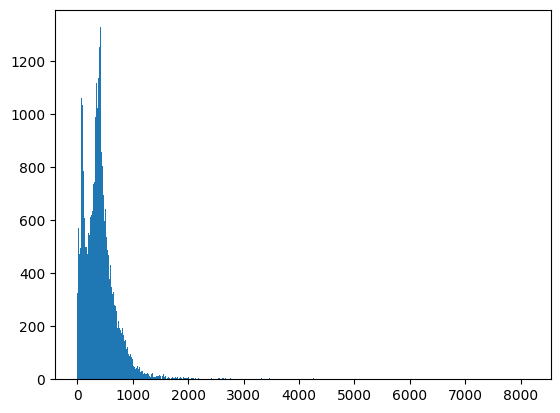

In [52]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [53]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [54]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [55]:
len(X[10])

1000

In [56]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [57]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix


In [58]:
embedding_vectors = get_weight_matrix(w2v_model)

In [59]:
embedding_vectors.shape

(231873, 100)

In [60]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23304677 (88.90 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23187300 (88.45 MB)
_________________________________________________________________


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [63]:
model.fit(X_train, y_train, validation_split=0.3, epochs=1)

737/737 [==============================] - 1244s 2s/step - loss: 0.1444 - acc: 0.9476 - val_loss: 0.0834 - val_acc: 0.9711


In [64]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 185s 525ms/step


In [65]:
accuracy_score(y_test, y_pred)

0.9728285077951002

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5854
           1       0.96      0.98      0.97      5371

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



In [67]:
x = ['this is a news']

In [68]:
X_test

array([[    0,     0,     0, ...,  3109,     1,  2068],
       [    0,     0,     0, ...,   751,  1068,   235],
       [    0,     0,     0, ...,    98,    11,    63],
       ...,
       [    0,     0,     0, ...,  4187, 12338,  5915],
       [    0,     0,     0, ...,    47,   608,  3065],
       [    0,     0,     0, ...,   922, 27975,   478]], dtype=int32)

In [69]:
#len(tokenizer.texts_to_matrix(x)[0])

In [70]:
x = ['India has recorded 55 new coronavirus infections']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [71]:
(model.predict(x) >= 0.5).astype(int)

1/1 [==============================] - 0s 81ms/step


array([[0]])

In [72]:
model.predict(x)

1/1 [==============================] - 0s 72ms/step


array([[0.00950823]], dtype=float32)